In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


## Adding some noise

In [11]:
x_train_noisy = x_train + np.random.normal(loc = 0.0, scale = 0.5, size = x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc = 0.0, scale = 0.5, size = x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(50000, 3072)
(10000, 3072)


In [12]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'sigmoid')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [16]:
autoencoder.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
autoencoder.fit(x_train_noisy, x_train_noisy, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test_noisy, x_test_noisy])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.1359 - accuracy: 4.4000e-04 - val_loss: 0.1325 - val_accuracy: 2.0000e-04
Epoch 2/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.1301 - accuracy: 9.0000e-04 - val_loss: 0.1296 - val_accuracy: 2.0000e-04
Epoch 3/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.1295 - accuracy: 2.4000e-04 - val_loss: 0.1295 - val_accuracy: 7.0000e-04
Epoch 4/50
50000/50000 [==============================] - 11s 215us/step - loss: 0.1294 - accuracy: 0.0011 - val_loss: 0.1294 - val_accuracy: 1.0000e-04
Epoch 5/50
50000/50000 [==============================] - 12s 247us/step - loss: 0.1293 - accuracy: 2.4000e-04 - val_loss: 0.1289 - val_accuracy: 0.0000e+00
Epoch 6/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.1278 - accuracy: 5.2000e-04 - val_loss: 0.1276 - val_accuracy: 0.0019
Epoch 7/50
50000/50

In [17]:
encoded_test_data = encoder.predict(x_test_noisy)
predicted_test_data = autoencoder.predict(x_test_noisy)

In [18]:
encoded_test_data.shape

(10000, 32)

In [19]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [20]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [21]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Denoised_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Denoising_Encoders_Test_RSAM.csv', index = False)

In [22]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : bird


In [23]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 7


In [24]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test_noisy)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [25]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [26]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
86,2,bird,0.0,0.000000,0.0,0.0,0.0,0.745128,0.0,0.0,...,0.0,1.020515,0.0,0.305866,0.0,0.0,1.337139,1.203558,1.000000,0.000000
6449,8,ship,0.0,0.000000,0.0,0.0,0.0,1.025505,0.0,0.0,...,0.0,1.144647,0.0,0.692295,0.0,0.0,1.442764,1.690359,0.992308,0.007692
4845,3,cat,0.0,0.000000,0.0,0.0,0.0,0.956742,0.0,0.0,...,0.0,0.856175,0.0,0.777164,0.0,0.0,1.344214,1.176867,0.987693,0.012307
6107,9,truck,0.0,0.000000,0.0,0.0,0.0,0.830507,0.0,0.0,...,0.0,1.234819,0.0,0.866252,0.0,0.0,1.702867,1.086315,0.987171,0.012829
6709,3,cat,0.0,0.000000,0.0,0.0,0.0,0.889014,0.0,0.0,...,0.0,0.991704,0.0,0.421098,0.0,0.0,1.462188,1.035453,0.981780,0.018220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,6,frog,0.0,1.370155,0.0,0.0,0.0,0.608631,0.0,0.0,...,0.0,0.709538,0.0,1.397880,0.0,0.0,0.793375,0.397856,0.727313,0.272687
2795,3,cat,0.0,0.920555,0.0,0.0,0.0,1.620487,0.0,0.0,...,0.0,1.230400,0.0,1.820583,0.0,0.0,0.251808,0.387533,0.724090,0.275910
6656,6,frog,0.0,1.878764,0.0,0.0,0.0,0.968706,0.0,0.0,...,0.0,1.274392,0.0,2.019972,0.0,0.0,0.460362,0.583668,0.718113,0.281887
5441,5,dog,0.0,1.628597,0.0,0.0,0.0,0.145196,0.0,0.0,...,0.0,0.483940,0.0,1.288364,0.0,0.0,0.850224,0.652659,0.710771,0.289229


In [27]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

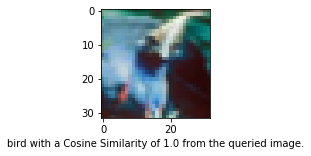

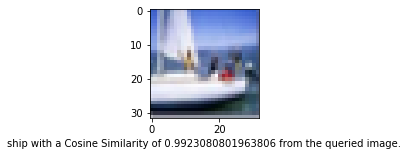

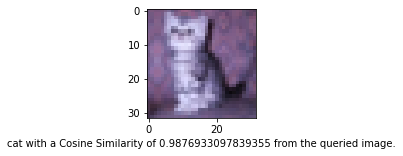

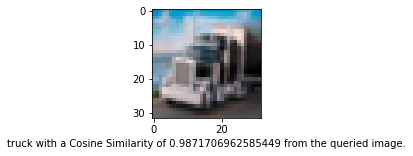

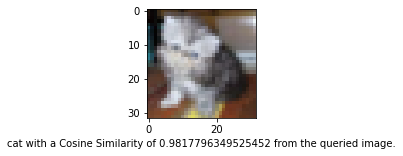

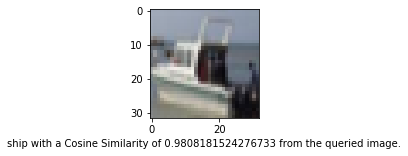

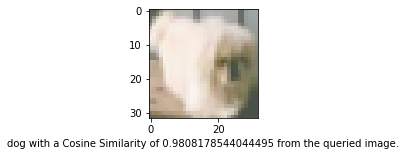

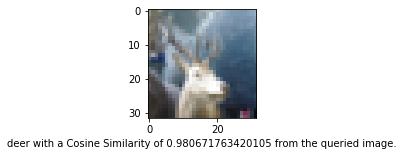

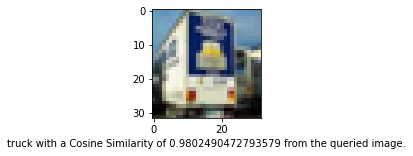

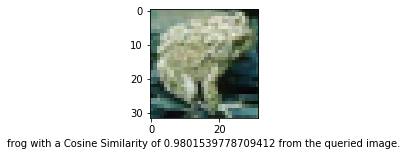

In [28]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [29]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [30]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
86,2,bird,0.0,0.000000,0.0,0.0,0.0,0.745128,0.0,0.0,...,1.020515,0.0,0.305866,0.0,0.0,1.337139,1.203558,1.000000,0.000000,0.000000
4845,3,cat,0.0,0.000000,0.0,0.0,0.0,0.956742,0.0,0.0,...,0.856175,0.0,0.777164,0.0,0.0,1.344214,1.176867,0.987693,0.012307,0.776596
6709,3,cat,0.0,0.000000,0.0,0.0,0.0,0.889014,0.0,0.0,...,0.991704,0.0,0.421098,0.0,0.0,1.462188,1.035453,0.981780,0.018220,0.842690
6107,9,truck,0.0,0.000000,0.0,0.0,0.0,0.830507,0.0,0.0,...,1.234819,0.0,0.866252,0.0,0.0,1.702867,1.086315,0.987171,0.012829,0.969215
4025,1,automobile,0.0,0.069138,0.0,0.0,0.0,0.690170,0.0,0.0,...,1.109679,0.0,0.249131,0.0,0.0,1.487504,0.958480,0.976811,0.023189,0.971741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,0,airplane,0.0,0.229131,0.0,0.0,0.0,2.085960,0.0,0.0,...,1.823915,0.0,2.687646,0.0,0.0,1.433180,0.938896,0.871719,0.128281,4.225315
4181,0,airplane,0.0,1.208832,0.0,0.0,0.0,1.225403,0.0,0.0,...,1.459317,0.0,2.873904,0.0,0.0,1.529267,1.581223,0.868243,0.131757,4.324401
9482,0,airplane,0.0,0.708274,0.0,0.0,0.0,2.556827,0.0,0.0,...,2.262480,0.0,1.855694,0.0,0.0,1.109617,1.194672,0.865608,0.134392,4.357800
2767,5,dog,0.0,0.000000,0.0,0.0,0.0,2.052184,0.0,0.0,...,2.608188,0.0,2.584546,0.0,0.0,1.057239,1.235274,0.842755,0.157245,4.414747


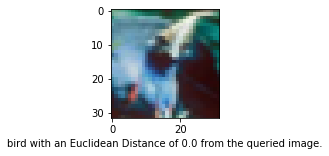

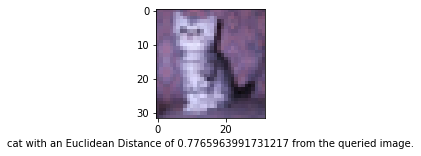

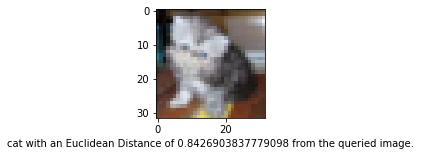

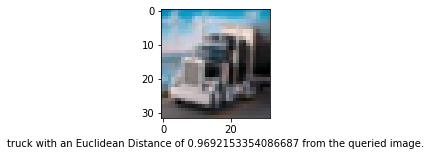

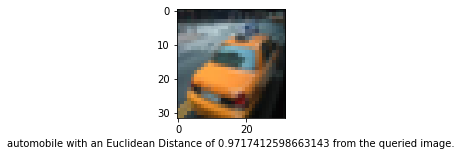

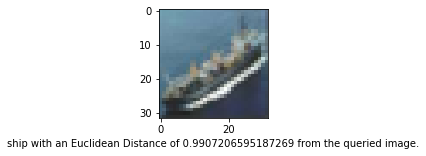

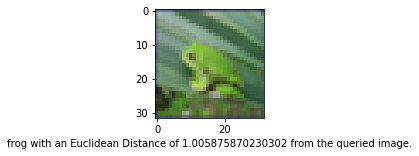

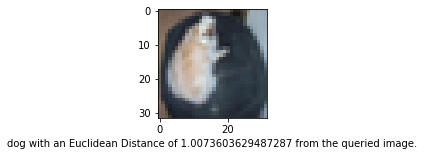

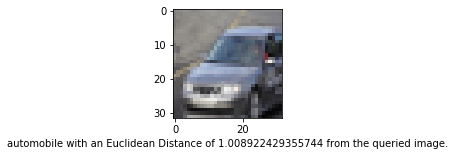

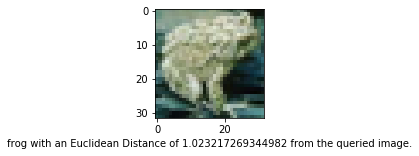

In [31]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()